# Fully connected two-layer classifier network

## Notes

* TensorFlow : *Machine learning framework* [[Link]](https://www.tensorflow.org/)
* Keras : *High level neural networks application programming interface (API) which has been integrated into TensorFlow* [[Link]](https://keras.io/)


* **Keras** is written in Python and uses TensorFlow as a back-end on CPUs and GPUs. It was developed with a focus on enabling fast experimentation and prototyping through user friendliness, modularity, and extensibility.


## Create a fully connected two-layer classifier network in Keras

### Import required Python libraries



In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Activation
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import SGD



### Import and shape the dataset

* typically the data should be pre-processed and shaped before being imported
* typically the dataset, comprising a set of **input:ouput pairs**, is split in a **seen** dataset used for *training* and *validating* the neural network, and an **unseen** dataset used for *testing* the performance of the trained neural network with: <br>
sklearn.model_selection.train_test_split
* the output class of each sample needs to be **one-hot encoded** for classification applications

* Importing and shaping the data *

input_train (original):  (60000, 28, 28)
input_test (original):  (10000, 28, 28)

input_train :  (60000, 28, 28, 1)
output_train_class :  (60000,)
output_train_class_onehot :  (60000, 10)

input_test :  (10000, 28, 28, 1)
output_test_class :  (10000,)
output_test_class_onehot :  (10000, 10)

output_class_names :  ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

item_id :  5
output_train_class [item_id] :  2
output_train_class_onehot [item_id] :  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


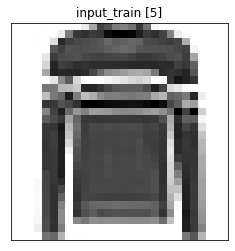

In [ ]:
print('* Importing and shaping the data *')
print()

mnist = tf.keras.datasets.fashion_mnist  # load mnist dataset from tensorflow
(input_train, output_train_class), (input_test, output_test_class) = mnist.load_data()

print('input_train (original): ', input_train.shape)
print('input_test (original): ', input_test.shape)
print()

input_train= input_train.reshape(input_train.shape[0], 28, 28, 1)  # add an extra dimension to array
input_test= input_test.reshape(input_test.shape[0], 28, 28, 1)

input_train = input_train / 255.0  # max normalise the image data[0:1]
input_test = input_test / 255.0

output_train_class_onehot = tf.keras.utils.to_categorical(output_train_class, 10)  # create one-hot encoded class
output_test_class_onehot = tf.keras.utils.to_categorical(output_test_class, 10)

output_class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']    # class names string

print('input_train : ', input_train.shape)
print('output_train_class : ', output_train_class.shape)
print('output_train_class_onehot : ', output_train_class_onehot.shape)
print()
print('input_test : ', input_test.shape)
print('output_test_class : ', output_test_class.shape)
print('output_test_class_onehot : ', output_test_class_onehot.shape)
print()
print('output_class_names : ', output_class_names)
print()

item_id = 5

print('item_id : ', item_id)
print('output_train_class [item_id] : ', output_train_class[item_id])
print('output_train_class_onehot [item_id] : ', output_train_class_onehot[item_id, :])

plt.imshow(input_train[item_id, :, :, 0], cmap=plt.cm.binary)
plt.title('input_train [' + str(item_id) + ']')
plt.grid(None)
plt.xticks([])
plt.yticks([])
plt.show()

### Define the network hyperparameters

* **hyperparameters** are the variables which determine the network structure and how the network is trained
* structural hyperparameters: number of hidden layers, number of nodes in each layer...
* training hyperparameters: learning rate, dropout ratio, number of epochs...
* hyperparameters are set before training

In [ ]:
loss = 'categorical_crossentropy'  # loss (cost) function to be minimised by the optimiser
metrics = ['categorical_accuracy']  # network accuracy metric to be determined after each epoch
dropout_ratio = 0.0  # % of nodes in the hidden layer to dropout during back-propagation update of the network weights
validtrain_split_ratio = 0.2  # % of the seen dataset to be put aside for validation, rest is for training
max_epochs = 40  # maxmimum number of epochs to be iterated
batch_size = 500   # batch size for the training data set
batch_shuffle = True   # shuffle the training data prior to batching before each epoch

### Define the network architecture

* using the Keras' *functional* model  [[Link]](https://keras.io/models/model/)
* can also use Keras' *sequential* model but limited to simpler architectures  [[Link]](https://keras.io/models/sequential/)
* can specify the type of each layer, for example dense (fully connected), convolutional, dropout etc. [[Link]](https://keras.io/layers/about-keras-layers/)
* can specify the activation function to be used in each layer, for example sigmoid, relu etc. [[Link]](https://keras.io/activations/)
* **softmax** activation, also known as *softargmax* or *normalized exponential function*, is typically used for the final layer of a classifier network to normalise its output into a probability distribution of the classes
* network weights are typically initialised with random values


In [ ]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image

def create_model(num_hidden_nodes, learning_rate, print_summary=False):

    optimizer_type = SGD(learning_rate=learning_rate)  # optimisation algorithm: SGD stochastic gradient decent 

    input_shape = (28, 28, 1)
    inputs = Input(shape=input_shape)

    flatten = Flatten()(inputs)   # 784 nodes = 28x28

    dense_01 = Dense(num_hidden_nodes)(flatten)
    dense_01 = Activation('relu')(dense_01)
    dense_01 = Dropout(dropout_ratio)(dense_01)

    dense_02 = Dense(10)(dense_01)
    outputs = Activation('softmax')(dense_02)

    model = Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer=optimizer_type, loss=loss, metrics=metrics)

    if print_summary:
        print(model.summary())
        plot_model(model, show_shapes=True, show_layer_names=True, to_file='model.png')

    return model

### Train the neural network with 100 nodes and a learning rate of 0.01

In [ ]:
model = create_model(num_hidden_nodes=100, learning_rate=0.01, print_summary=True)

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 100)               78500     
                                                                 
 activation_8 (Activation)   (None, 100)               0         
                                                                 
 dropout_4 (Dropout)         (None, 100)               0         
                                                                 
 dense_9 (Dense)             (None, 10)                1010      
                                                                 
 activation_9 (Activation)   (None, 10)                0   

In [ ]:
print('* Training the compiled network *')
print()

history = model.fit(input_train, output_train_class_onehot, \
                    batch_size=batch_size, \
                    epochs=max_epochs, \
                    validation_split=validtrain_split_ratio, \
                    shuffle=batch_shuffle)

print()
print('Training completed')
print()

* Training the compiled network *

Epoch 1/40
96/96 [==============================] - 1s 8ms/step - loss: 1.7048 - categorical_accuracy: 0.4970 - val_loss: 1.2999 - val_categorical_accuracy: 0.6587
Epoch 2/40
96/96 [==============================] - 1s 6ms/step - loss: 1.1354 - categorical_accuracy: 0.6735 - val_loss: 1.0024 - val_categorical_accuracy: 0.6997
Epoch 3/40
96/96 [==============================] - 1s 7ms/step - loss: 0.9416 - categorical_accuracy: 0.7107 - val_loss: 0.8769 - val_categorical_accuracy: 0.7253
Epoch 4/40
96/96 [==============================] - 1s 8ms/step - loss: 0.8467 - categorical_accuracy: 0.7345 - val_loss: 0.8047 - val_categorical_accuracy: 0.7442
Epoch 5/40
96/96 [==============================] - 1s 7ms/step - loss: 0.7870 - categorical_accuracy: 0.7491 - val_loss: 0.7564 - val_categorical_accuracy: 0.7594
Epoch 6/40
96/96 [==============================] - 1s 6ms/step - loss: 0.7441 - categorical_accuracy: 0.7622 - val_loss: 0.7202 - val_categorica

### Plot the training history of the network

* usefull for seeing the convergence of the training, oscillations of the cost function between local minima, and the presence of over fitting

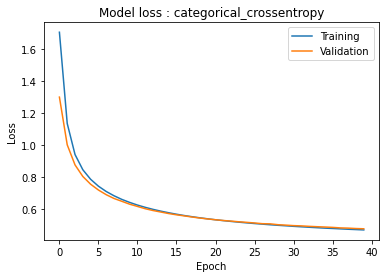

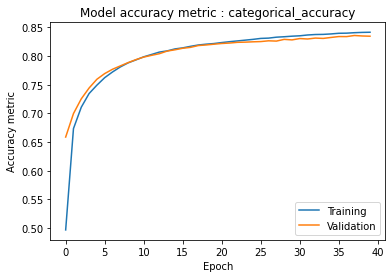

In [ ]:
# model loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss : ' + loss)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='best')
plt.show()
plt.close()

# model accuracy metric

plt.plot(np.array(history.history[metrics[0]]))
plt.plot(np.array(history.history['val_' + metrics[0]]))
plt.title('Model accuracy metric : ' + metrics[0])
plt.ylabel('Accuracy metric')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='best')
plt.show()
plt.close()

### Evaluate the trained network performance on the unseen test dataset

* the performance of the trained network on unseen data can be assessed using: .evaluate()

In [ ]:
print('* Evaluating the performance of the trained network on the unseen test dataset *')
print()

evaluate_model = model.evaluate(x=input_test, y=output_test_class_onehot)
loss_metric = evaluate_model [0]
accuracy_metric = evaluate_model [1]

print()
print('Accuracy - ' + metrics[0] + ': %0.3f'%accuracy_metric)
print('Loss - ' + loss + ': %0.3f'%loss_metric)

* Evaluating the performance of the trained network on the unseen test dataset *

313/313 [==============================] - 1s 2ms/step - loss: 0.5003 - categorical_accuracy: 0.8290

Accuracy - categorical_accuracy: 0.829
Loss - categorical_crossentropy: 0.500


### Train the neural network with a variable number of nodes and a learning rate of 0.1

In [ ]:
#Fix the learning rate at 0.1 and change the number of nodes in the hidden layer from 10 to 10000. Plot the trained and validation network accuracy vs. the number of nodes.
learning_rate_1 = 0.1
num_hidden_nodes_1 = [x for x in range(10, 10000, 500)]
accuracy_1 = []
for i in num_hidden_nodes_1:
    model = create_model(num_hidden_nodes=i, learning_rate=learning_rate_1)
    history = model.fit(input_train, output_train_class_onehot, \
                    batch_size=batch_size, \
                    epochs=max_epochs, \
                    validation_split=validtrain_split_ratio, \
                    shuffle=batch_shuffle)
    accuracy_1.append(history.history['val_categorical_accuracy_1'][-1])

Epoch 1/40
96/96 [==============================] - 1s 6ms/step - loss: 1.5012 - categorical_accuracy: 0.5126 - val_loss: 0.8220 - val_categorical_accuracy: 0.7138
Epoch 2/40
96/96 [==============================] - 0s 4ms/step - loss: 0.7359 - categorical_accuracy: 0.7394 - val_loss: 0.6512 - val_categorical_accuracy: 0.7738
Epoch 3/40
96/96 [==============================] - 0s 4ms/step - loss: 0.6315 - categorical_accuracy: 0.7780 - val_loss: 0.5902 - val_categorical_accuracy: 0.7930
Epoch 4/40
96/96 [==============================] - 0s 4ms/step - loss: 0.5706 - categorical_accuracy: 0.7982 - val_loss: 0.5807 - val_categorical_accuracy: 0.7876
Epoch 5/40
96/96 [==============================] - 1s 5ms/step - loss: 0.5497 - categorical_accuracy: 0.8063 - val_loss: 0.5405 - val_categorical_accuracy: 0.8092
Epoch 6/40
96/96 [==============================] - 1s 9ms/step - loss: 0.5206 - categorical_accuracy: 0.8180 - val_loss: 0.5224 - val_categorical_accuracy: 0.8145
Epoch 7/40
96/96

In [ ]:
plt.plot(num_hidden_nodes_1, accuracy_1)
plt.title('Model accuracy_1 metric : ' + metrics[0])
plt.ylabel('Accuracy metric')
plt.xlabel('Number of nodes')
plt.xscale('log')
plt.legend(['Validation'], loc='best')
plt.show()

### Train the neural network with 500 nodes and a variable learning rate

In [ ]:
# Fix the number of nodes in the hidden layer to 500 and change the learning rate from 0.01 to 10. Plot the trained and validation network accuracy vs. learning rate.

num_hidden_nodes_2 = 500
learning_rate_2 = [x for x in range(0.01, 10, 0.1)]
accuracy_2 = []

for i in learning_rate_2:
    model = create_model(num_hidden_nodes=num_hidden_nodes_2, learning_rate=i)
    history = model.fit(input_train, output_train_class_onehot, \
                    batch_size=batch_size, \
                    epochs=max_epochs, \
                    validation_split=validtrain_split_ratio, \
                    shuffle=batch_shuffle)
    accuracy_2.append(history.history['val_categorical_accuracy_2'][-1])


Epoch 1/40
96/96 [==============================] - 1s 7ms/step - loss: 1.6141 - categorical_accuracy: 0.5339 - val_loss: 1.1847 - val_categorical_accuracy: 0.6778
Epoch 2/40
96/96 [==============================] - 0s 4ms/step - loss: 1.0490 - categorical_accuracy: 0.6872 - val_loss: 0.9325 - val_categorical_accuracy: 0.7098
Epoch 3/40
96/96 [==============================] - 0s 5ms/step - loss: 0.8841 - categorical_accuracy: 0.7216 - val_loss: 0.8267 - val_categorical_accuracy: 0.7383
Epoch 4/40
96/96 [==============================] - 0s 4ms/step - loss: 0.8009 - categorical_accuracy: 0.7436 - val_loss: 0.7629 - val_categorical_accuracy: 0.7563
Epoch 5/40
96/96 [==============================] - 1s 6ms/step - loss: 0.7473 - categorical_accuracy: 0.7591 - val_loss: 0.7212 - val_categorical_accuracy: 0.7621
Epoch 6/40
96/96 [==============================] - 1s 6ms/step - loss: 0.7085 - categorical_accuracy: 0.7719 - val_loss: 0.6868 - val_categorical_accuracy: 0.7734
Epoch 7/40
96/96

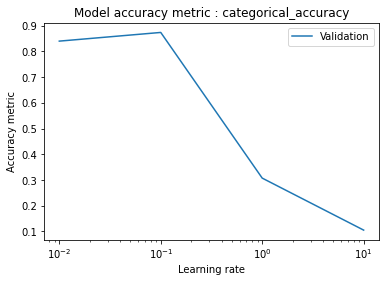

In [ ]:
plt.plot(learning_rate_2, accuracy_2)
plt.title('Model accuracy_2 metric : ' + metrics[0])
plt.ylabel('Accuracy_2 metric')
plt.xlabel('Learning rate 2')
plt.legend(['Validation'], loc='best')
plt.xscale('log')
plt.show()